In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_long_salary_19-20')

In [3]:
qbs.dtypes

NAME          object
LONG           int64
LONG_rank    float64
salary         int64
dtype: object

In [4]:
qbs.head()

,NAME,LONG,LONG_rank,salary
0,Matt Ryan,93,1.0,30000000
1,Sam Darnold,92,2.0,7561929
2,Baker Mayfield,89,4.0,8170745
3,Kyler Murray,88,5.0,8789661
4,Patrick Mahomes,83,7.5,4106447


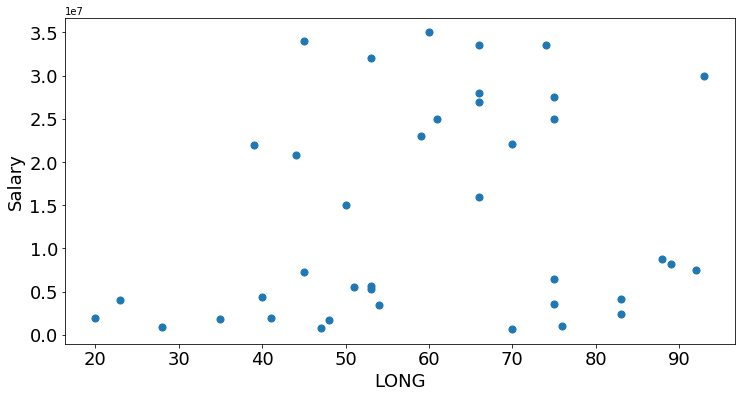

In [5]:
ax = qbs.plot(kind="scatter", x = 'LONG',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('LONG', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['LONG', 'salary']])

In [7]:
X.mean(axis = 0)

array([1.59416639e-16, 2.84672570e-18])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-1.77539611, -0.96691392],
       [-0.6173863 , -0.72396857],
       [ 0.67047714,  1.10320237],
       [ 1.14482832, -0.75540453],
       [-0.43747168,  1.13959441]])

In [11]:
km.predict(X)

array([2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 4, 4, 4, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4, 0, 0, 0, 0], dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,LONG,LONG_rank,salary,clusters
0,Matt Ryan,93,1.0,30000000,2
1,Sam Darnold,92,2.0,7561929,3
2,Baker Mayfield,89,4.0,8170745,3
3,Kyler Murray,88,5.0,8789661,3
4,Patrick Mahomes,83,7.5,4106447,3


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[2.65000000e+01, 2.21331225e+06],
       [4.82000000e+01, 5.11745470e+06],
       [7.23333333e+01, 2.69592592e+07],
       [8.12222222e+01, 4.74167267e+06],
       [5.15714286e+01, 2.73942857e+07]])

In [14]:
qbs.groupby('clusters')[['LONG', 'salary']].mean()

,LONG,salary
clusters,,
0,26.500000,2.213312e+06
1,48.200000,5.117455e+06
2,72.333333,2.695926e+07
3,81.222222,4.741673e+06
4,51.571429,2.739429e+07


In [15]:
centroids = qbs.groupby('clusters')[['LONG', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

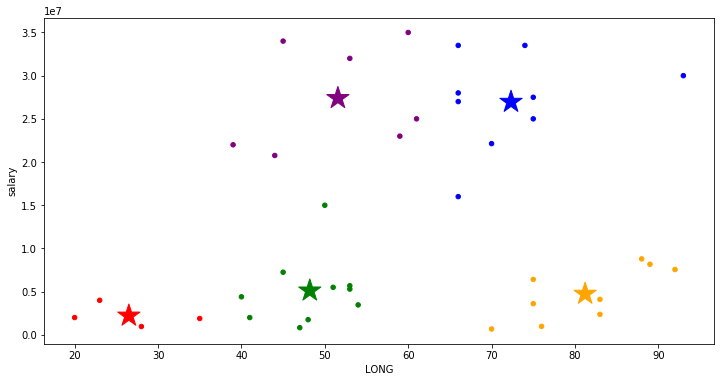

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'LONG', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'LONG', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

10.2380563774383

In [18]:
silhouette_score(X, km.labels_)

0.45038666816248935